In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import seaborn as sns

# Build results tables

In [49]:
N_patients = {
    "AM":14646484, 
    "AU":973941,
    "CH":521211,
    "DER":771281,
    "GGH":748889,
    "HNO":564501,
    "IM":1693363,
    "KI":743235,
    "NEU":212302,
    "ORTR":1518719,
    "PSY":170016,
    "RAD":1593710,
    "URO":394209
}

specialty_map = {
    "AM":"GP", 
    "AU":"OPH",
    "CH":"SRG",
    "DER":"DER",
    "GGH":"OBGYN",
    "HNO":"ENT",
    "IM":"IM",
    "KI":"PED",
    "NEU":"NEU",
    "ORTR":"ORTH",
    "PSY":"PSY",
    "RAD":"RAD",
    "URO":"OPT"
}

In [61]:
fname = "states_doc_info_total_hour-based_quarterly.csv"
N_patients = pd.read_csv(join(src, fname))

In [62]:
N_patients

,state,state_id,IM_total,IM_cap_total,IM_unique_docs,KI_total,KI_cap_total,KI_unique_docs,PSY_total,PSY_cap_total,...,NEU_unique_docs,AU_total,AU_cap_total,AU_unique_docs,GGH_total,GGH_cap_total,GGH_unique_docs,AM_total,AM_cap_total,AM_unique_docs
0,Burgenland,1,54095,182420,41,22685,36612,9,6231,15900,...,6,31088,54737,11,21960,42068,16,668681,1210643,184
1,Kärnten,2,128060,395240,79,44518,122057,22,16426,34374,...,7,66537,138258,31,52118,94542,33,1013551,2096962,340
2,Niederösterreich,3,272332,815589,171,99811,236660,50,2997,42034,...,10,185152,328894,66,126177,252773,85,3623897,6254345,962
3,Oberösterreich,4,197488,516180,111,96416,197132,45,22685,88404,...,29,144267,307236,70,128732,245213,89,2280551,5379714,863
4,Salzburg,5,97184,313432,73,52168,106396,22,16732,39543,...,15,62977,130490,33,49564,99314,35,885607,1833550,295
5,Steiermark,6,278227,743804,161,96162,192775,39,16887,35432,...,9,138764,267628,59,96933,190593,69,2643605,4618882,724
6,Tirol,7,156257,504758,122,68302,173626,31,27019,52368,...,20,67127,150597,36,65718,188946,62,1431273,2736526,422
7,Vorarlberg,8,60303,242157,62,43925,107742,22,14196,39721,...,10,34739,95895,24,31187,90062,33,532763,1281563,199
8,Wien,9,449417,1470779,238,219248,451515,96,46843,99097,...,60,243290,487674,106,176500,390034,130,1566556,6333949,978


In [63]:
src = "results"
fname = "states_doc_info_total_hour-based_quarterly.csv"
N_patients = pd.read_csv(join(src, fname))
fname = "searching_pats_{}_iter10_shocksize{}.csv"
specialties = ["AM", "AU", "CH", "DER", "GGH", "HNO", "IM", "KI",
               "NEU", "ORTR", "PSY", "RAD", "URO"]
shocksizes = [7, 10, 15, 20]

results = pd.DataFrame()
for shocksize in shocksizes:
    for spec in specialties:
        df = pd.read_csv(join(src, fname.format(spec, shocksize)),
                         names=[f"step_{i}" for i in range(1, 11)], header=None)
        for col in df.columns:
            df[col] = df[col] / N_patients[f"{spec}_total"].sum() * 100
        df["run"] = range(1, 11)
        df["specialty"] = specialty_map[spec]
        df["shocksize"] = shocksize
        
        cols = ["step_1", "step_10", "run", "specialty", "shocksize"]
        results = pd.concat([results, df[cols]])
results = results.reset_index(drop=True)

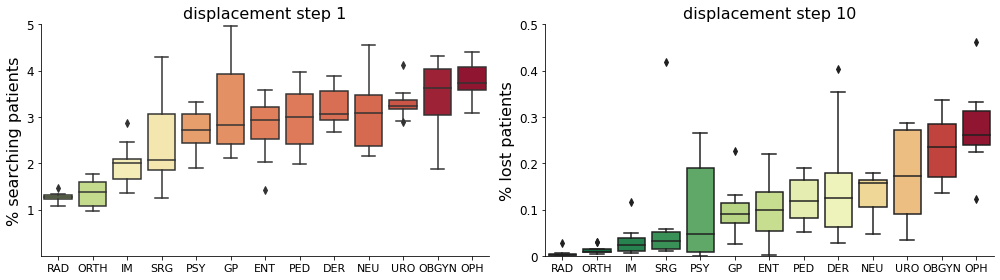

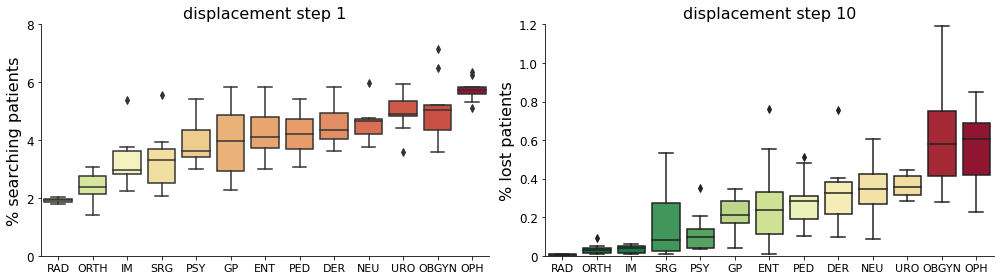

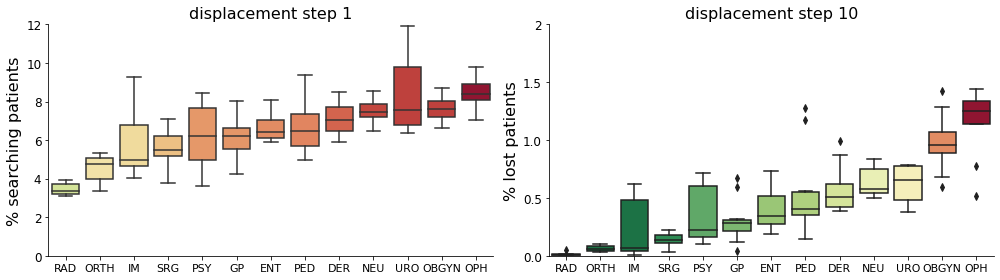

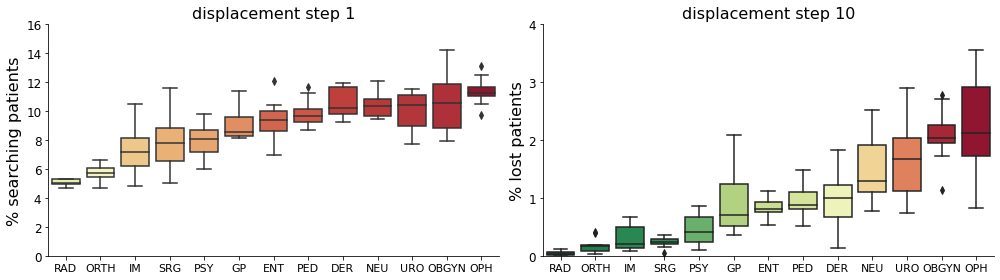

In [83]:
ylims = {7:[5, 0.5], 10:[8, 1], 15:[10, 2], 20:[14, 3]}
yticks_t1 = {
    7:[1, 2, 3, 4, 5], 
    10:[0, 2, 4, 6, 8], 
    15:[0, 2, 4, 6, 8, 10, 12], 
    20:[0, 2, 4, 6, 8, 10, 12, 14, 16]}
yticks_t10 = {
    7:[0, 0.1, 0.2, 0.3, 0.4, 0.5],
    10:[0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2], 
    15:[0., 0.5, 1.0, 1.5, 2],
    20:[0, 1, 2, 3, 4]
}
ylabels = {1: "% searching patients",
           10: "% lost patients"}

for shock_size in [7, 10, 15, 20]:
    df = results[results["shocksize"] == shock_size]
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    cmap = plt.get_cmap("RdYlGn_r")
    
    for i, step in enumerate([1, 10]):
        ax = axes[i]
        agg = df[["specialty", f"step_{step}"]]\
            .groupby("specialty")\
            .agg("median")\
            .sort_values(by=f"step_{step}")
        order = agg.index
        max_val = agg[f"step_{step}"][-1]
        palette = [cmap(i) for i in agg[f"step_{step}"] / max_val]
        
        sns.boxplot(
            ax=ax,
            x="specialty",
            y=f"step_{step}",
            data=df,
            order=order,
            palette=palette
        )
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_ylabel(ylabels[step], fontsize=16)
        ax.set_xlabel("")
        ax.set_title(f"displacement step {step}", fontsize=16)
        ax.set_xticks(range(len(labels)))
        ax.set_xticklabels(labels, fontsize=11)

    axes[0].set_ylim(0, ylims[shock_size][0])
    axes[0].set_yticks(yticks_t1[shock_size])
    axes[0].set_yticklabels(yticks_t1[shock_size], fontsize=12)
    axes[1].set_ylim(0, ylims[shock_size][1])
    axes[1].set_yticks(yticks_t10[shock_size])
    axes[1].set_yticklabels(yticks_t10[shock_size], fontsize=12)
    fig.tight_layout()
    plt.savefig(f"figures/shock_results_{shock_size}.svg")